# Introducción  

Matplotlib es la principal herramienta para hacer gráficos en Python. 

Un problema es que es un libreria complicada y la [Documentación](https://matplotlib.org/) oficial no es muy clara.

En general uno no utiliza matplotlib, sino [Seaborn](https://seaborn.pydata.org/) y [Plotly](https://plotly.com/python/), pero estas dos se basan en matplotlib por ende es importante entenderla.

# Librerias

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import os #manejo de Directorios
from IPython.display import Image #Para mostrar Imagenes

----

# Elementos Matplotlib 

Una buena referencia para entender matplotlib: https://www.kaggle.com/python10pm/matplotlib-learn-40-plots-step-by-step/data

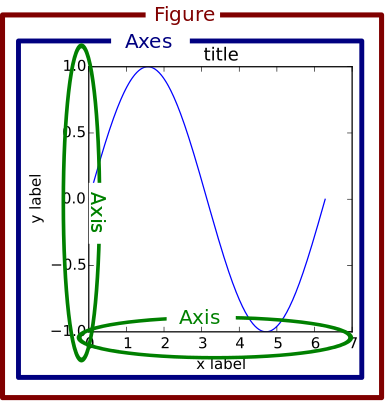

In [2]:
PATH = "Imagenes/FIguresAxes.png"
Image(PATH)

Principalmente la Figura contiene todos los gráficos, y dentro de esta cada gráfico se denomina "Axes". 

Hay muchas formas de crear estos objetos pero la mejor forma es utilizar la Métodología orientada a Objetos (OOP).

# Parte I: Metodología OOP

###  1° Método: fig.add_subplot()

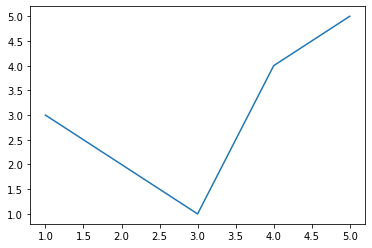

In [6]:
fig = plt.figure()

# Creamos la figura
# Luego creamos un axes, un subplot 
# 111 indica -> numero de axe, filas, columnas
# pasar 11 es opcional

ax1 = fig.add_subplot(1, 1, 1)

x = [1, 2, 3, 4, 5]
y = [3, 2, 1, 4, 5]

# plot -> gráfico de linea
ax1.plot(x, y)


### 2° Método:  fig.subplots()

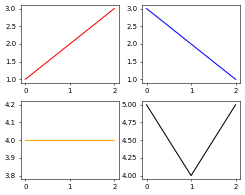

In [7]:
fig = plt.figure(figsize=(5,4), dpi=50)

# figsize determina el tamaño del gráfico fila,columna
# Creamos 4 subplots dos filas dos columnas

(ax1, ax2), (ax3, ax4) = fig.subplots(2,2)
ax1.plot([1,2,3], color = "red")
ax2.plot([3,2,1], color = "blue")
ax3.plot([4,4,4], color = "orange")
ax4.plot([5,4,5], color = "black")

#tigh_loyout hace que haya distancia entre todos los gráficos
plt.tight_layout()

### 3° Método: subplots() + for loop()

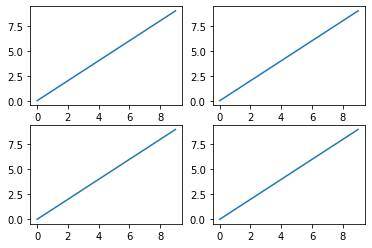

In [8]:
nrows = 2
ncolumns = 2

# En este caso en vez de crear figura y sublots por separado
# lo hacemos en una sola línea

fig, axes = plt.subplots(nrows, ncolumns)

for row in range(nrows):
    for column in range(ncolumns):
        ax = axes[row, column]
        ax.plot(np.arange(10))

### 4° Método: add_gridspec()  

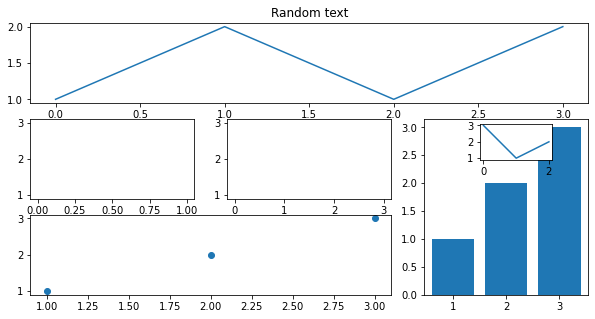

In [10]:
fig = plt.figure(figsize = (10, 5))
gs = fig.add_gridspec(3, 3)

# gridspec es como un array, en el cual
# podemos elegir que parte de la array queremos para 
# hacer gráficos, permite hacer gráficos con diferentes dimensiones

ax1 = fig.add_subplot(gs[0, :])
ax1.plot([1,2,1,2])
ax1.set_title("Random text")
ax2 = fig.add_subplot(gs[1,0])
ax2.plot(1,3,1)
ax3 = fig.add_subplot(gs[1,1])
ax3.plot(3,1,3)
ax4 = fig.add_subplot(gs[2,:-1])
ax4.scatter([1,2,3], [1,2,3])
ax5 = fig.add_subplot(gs[1:, -1])
ax5.bar([1,2,3], [1,2,3])
ax5_bis = fig.add_axes([0.75, 0.5, 0.1, 0.1])
ax5_bis.plot([3,1,2])

---

# Parte II:  Tipos de Gráficos 

```python
plt.plot() #line plot
plt.bar() # x discreta, y específicamos
plt.scatter()
plt.hist() #x continua
```


## Gráfico de linea

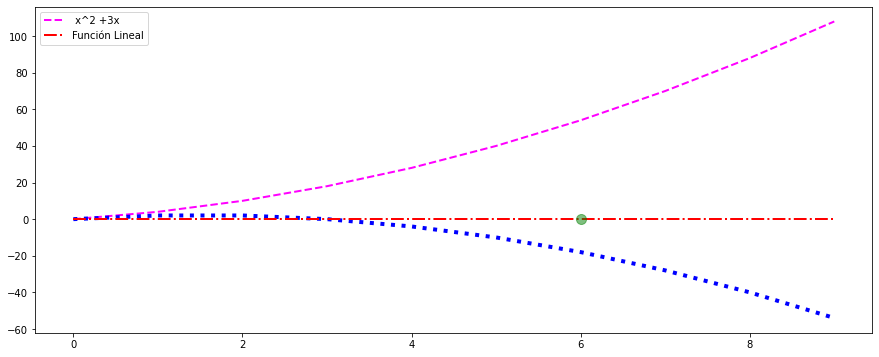

In [161]:
fig = plt.figure(figsize=(15,6))
#Definimos algunas funciones para gráficar 
x = np.arange(10)

y = lambda x: x**2 + 3*x  # función f(x) = x^2 +3x
y2 = lambda x: -x**2 + 3*x 
y3 = lambda x: 0*x 

fig.add_subplot()

plt.plot(x,y(x), lw=2, color="magenta", ls="--", label=f" x^2 +3x")
plt.plot(x,y2(x), lw=4, color="blue", ls=":")
plt.plot(x,y3(x), lw=2, color="red", ls="-.", label="Función Lineal")
plt.plot(6,y3(6), marker="o", markersize=10, color="green", alpha=0.5)

plt.legend();

Los principales componentes son:

```python
plt.plot(x,y, lw = LineWidth , color="Color!", ls="Line Style", label= "Leyenda")
```


Mas información en la [Documentación](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py) oficial.

## Gráfico de Histograma 
- x -> es continua
- y -> es estimada por matplotlib (density)

### Otro ejemplo 

Text(0.5, 1.0, 'Distribución Gamma')

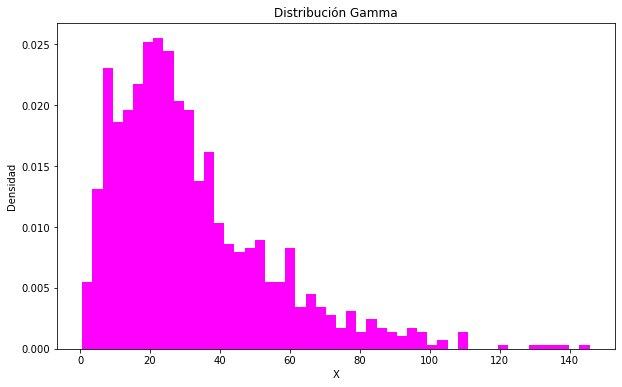

In [83]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

s = np.random.gamma(2, 15, 1000) #X, Gamma Distribution


ax.hist(s, bins=50, density=True, color="magenta");

plt.xlabel("X")
plt.ylabel("Densidad")
plt.title("Distribución Gamma")

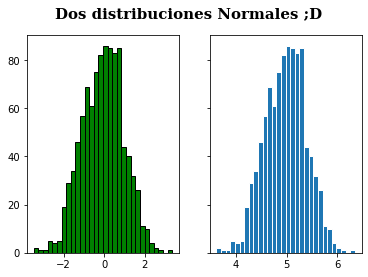

In [197]:
n_bins=30
#Distribución Normal x(media = 0)
# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(1000)

#Distribución Normal y(media = 5)
y = .4 * x + 5

fig, axs = plt.subplots(1, 2, sharey=True)

# axs es una lista con los axes
axs[0].hist(x, bins=n_bins, color="green", edgecolor='black')
axs[1].hist(y, bins=n_bins, edgecolor='white');

fig.suptitle("Dos distribuciones Normales ;D", fontsize=15, fontfamily='serif', fontweight='bold');

#### Principales componentes de plt.hist()

```python
plt.hist(x, color="Color!", density= True o False , label= "Leyenda")
```


## Gráfico Scatter 

Sinonimo de Gráfico de puntos

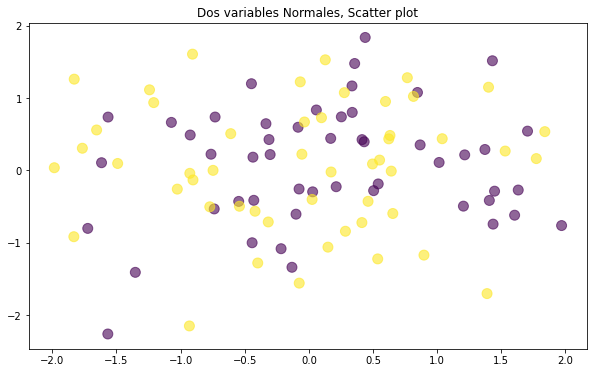

In [153]:
x = np.random.randn(100)
y = np.random.randn(100)

z = np.zeros(100)
z[50:]=1
c = x*y

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x,y, c=z, alpha=0.6, s=100)

plt.title("Dos variables Normales, Scatter plot");

#### Principales componentes de plt.hist()


```python
plt.scatter(x,y, color="Color!", alpha=float , size=float)
```

En este caso se puede hacer que el color dependa de otra variable al igual que el tamaño. 
Esta metodología la vamos a profundizar con Seaborn.

### Gráfico de Barras 

- X es discreta
- Y es discreta 


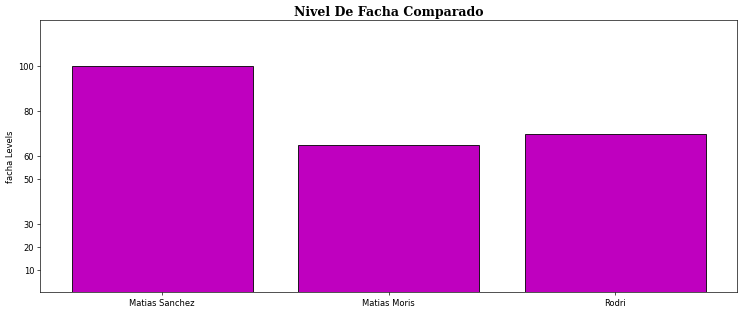

In [8]:
x = ["Matias Sanchez", "Matias Moris", "Rodri"]
y = [ 100, 65, 70]

plt.figure(figsize=(15,6),dpi=60)
plt.bar(x,y, edgecolor="black", color="m")

plt.ylim(0,120)
plt.yticks([10,20,30,50,60,80,100])
plt.ylabel("facha Levels")
plt.title("Nivel De Facha Comparado", fontsize=15, fontfamily='serif', fontweight='bold');


## Parte III: Extras  

#### Parámetros Generales

```python
markers = [".", ",", "o", "v", "^", "<", ">"]
colors or c = [ b: blue, g: green, r: red, c: cyan, m: magenta, y: yellow, k: black, w: white]
linestyle or ls: [ '-' | '--' | '-.' | ':' ]
lw : float
size or s: float
label: string
```




#### Ajustes a los Axes

```python
axs[0].set_xlim(0, 2)
axs[0].set_ylim(0, 2)
axs[0].xticks([0, 1, 2], ['January', 'February', 'March'],fontsize=7, fontfamily='serif')
axs[0].yticks([0, 1, 2], ['January', 'February', 'March'],fontsize=7, fontfamily='serif')
axs[0].set_xlabel('time')
axs[0].set_ylabel('label Y')
```

#### Ajustes Generales de la fígura
```python
fig.suptitle("Dos distribuciones Normales ;D", fontsize=15, fontfamily='serif', fontweight='bold');
plt.title('Netflix Contents Update', fontsize=12, fontfamily='serif', fontweight='bold')
plt.tight_layout()
```


---

```python

```

# ParteII Galería 

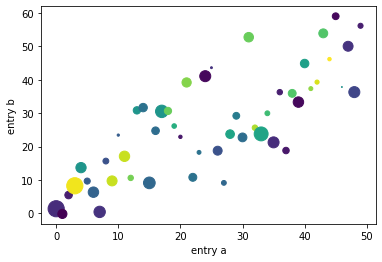

In [23]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

```python

```

### Gráfico Divertido



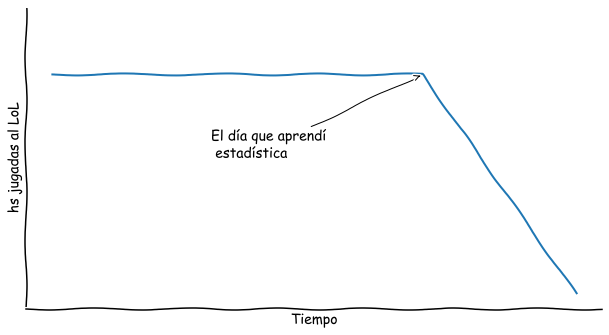

In [48]:
with plt.xkcd():
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'El día que aprendí \n estadística',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(30, -10))

    ax.plot(data)

    ax.set_xlabel('Tiempo')
    ax.set_ylabel('hs jugadas al LoL')


---

## Paletas de Color (para cmap)

Referencia : https://www.kaggle.com/subinium/simple-matplotlib-visualization-tips

- diverging
- qualitative (para categorías)
- sequential
- scientific

In [9]:
def cmap_plot(cmap_list, ctype):
    cmaps = cmap_list

    n = len(cmaps)

    fig = plt.figure(figsize=(8.25, n*.20), dpi=200)
    ax = plt.subplot(1, 1, 1, frameon=False, xlim=[0,10], xticks=[], yticks=[])
    fig.subplots_adjust(top=0.99, bottom=0.01, left=0.18, right=0.99)

    y, dy, pad = 0, 0.3, 0.08

    ticks, labels = [], []

    for cmap in cmaps[::-1]:
        Z = np.linspace(0,1,512).reshape(1,512)
        plt.imshow(Z, extent=[0,10,y,y+dy], cmap=plt.get_cmap(cmap))
        ticks.append(y+dy/2)
        labels.append(cmap)
        y = y + dy + pad

    ax.set_ylim(-pad,y)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)

    ax.tick_params(axis='y', which='both', length=0, labelsize=5)
    plt.title(f'{ctype} Colormap', fontweight='bold', fontsize=8)
    plt.show()

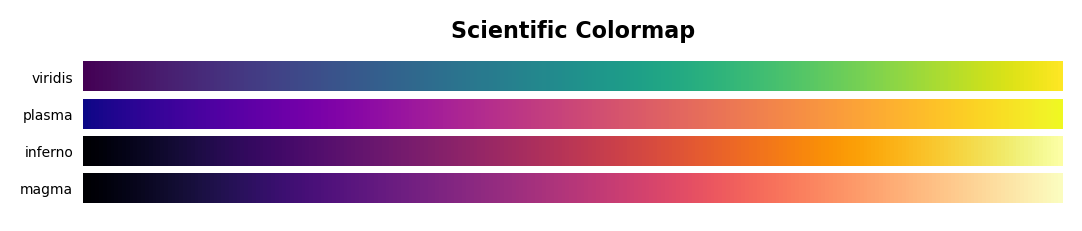

In [10]:
scientific_cmap = ('viridis', 'plasma', 'inferno', 'magma')
cmap_plot(scientific_cmap, 'Scientific')

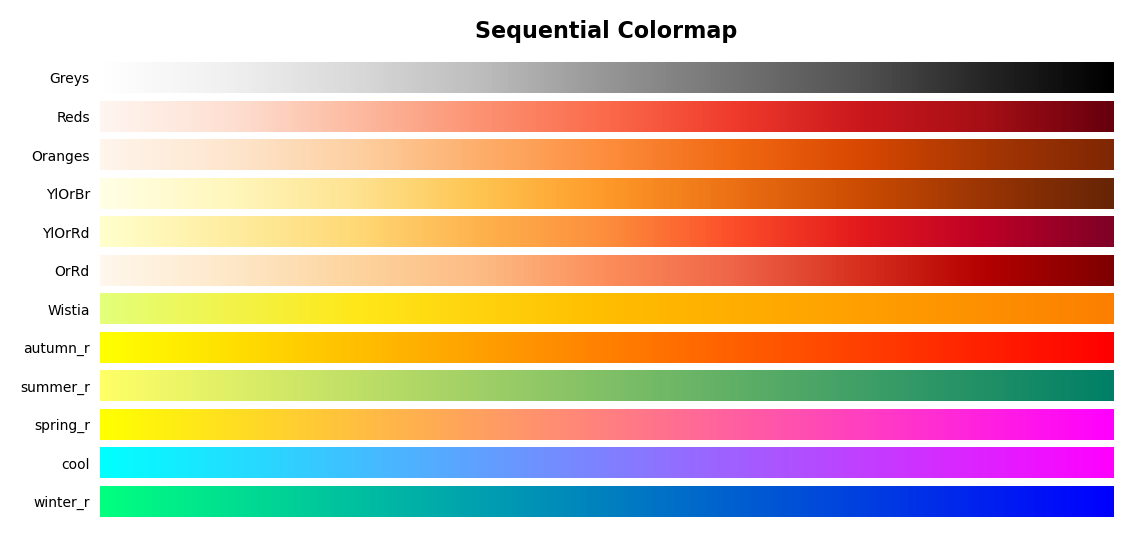

In [11]:
sequential_cmap = ('Greys', 'Reds', 'Oranges', 
         'YlOrBr', 'YlOrRd', 'OrRd', 
         'Wistia', 'autumn_r', 'summer_r', 'spring_r', 'cool', 'winter_r')            

cmap_plot(sequential_cmap, 'Sequential')

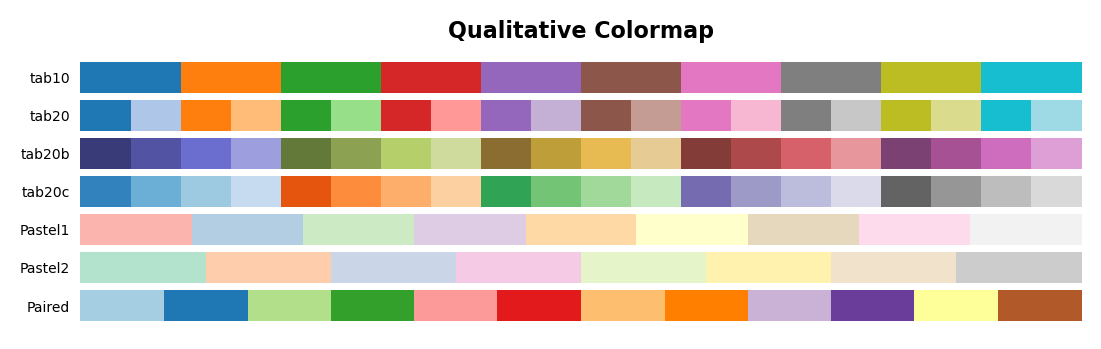

In [12]:
qualitative_cmap = ('tab10', 'tab20', 'tab20b', 'tab20c',
         'Pastel1', 'Pastel2', 'Paired' )

cmap_plot(qualitative_cmap, 'Qualitative')

---